# Course:  Convolutional Neural Networks for Image Classification

## Section-6
### Train designed CNNs models in Keras

**Description:**  
*Run training process for all developed models and all prepared datasets  
Save trained models and trained weights*

**File:** *training.ipynb*

### Algorithm:

**--> Step 1:** Load saved CNN model  
**--> Step 2:** Set up learning rate & epochs  
**--> Step 3: Train loaded model on all preprocessed datasets**  
**--> Step 4:** Show and plot results  


**Result:**  
- Binary files with saved weights  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.models import load_model
from keras.utils.np_utils import to_categorical
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, Callback


## Setting up full paths

In [2]:
# Full or absolute path to 'Section4' with preprocessed datasets
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section4'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section4'
full_path_to_Section4 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section4'


# Full or absolute path to 'Section5' with designed models
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section5'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section5'
full_path_to_Section5 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section5'


### Custom dataset, 1st model

## Step 1: Loading saved 1st model

In [3]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for custom dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'custom' + '/' + 
                                'model_1_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'custom' + '/' + 
                                 'model_1_custom_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [4]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Custom dataset, 1st model

## Step 2: Setting up learning rate & epochs

In [5]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### Custom dataset, 1st model

## Step 3: Training

In [6]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 1st model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 5)
    y_validation = to_categorical(y_validation, num_classes = 5)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'custom' + '/' + 'w_1' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'custom' + '/' + 'w_1' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Training RGB model with current dataset
        temp = model_rgb[i].fit(x_train, y_train,
                                batch_size=50,
                                epochs=epochs,
                                validation_data=(x_validation, y_validation),
                                callbacks=[learning_rate, best_weights],
                                verbose=1)

        
        # Adding results of 1st model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 1st model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()


Following dataset is successfully opened:         dataset_custom_rgb_255_mean.hdf5
Binary matrices are successfully created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save best weights is created:         dataset_custom_rgb_255_mean.hdf5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007694497527671316.
Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 1.6112 - accuracy: 0.1000
Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to custom\w_1_custom_rgb_255_mean.h5
1/1 [==============================] - 1s 722ms/step - loss: 1.6112 - accuracy: 0.1000 - val_loss: 0.4504 - val_accuracy: 1.0000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007309772651287749.
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.9519 - accuracy: 0.7000
Epoch 00002: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 57ms/step - loss: 0.9519 - accuracy: 0.7000 - val_loss: 0.4161 -

1/1 [==============================] - ETA: 0s - loss: 5.4835e-06 - accuracy: 1.0000
Epoch 00022: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 37ms/step - loss: 5.4835e-06 - accuracy: 1.0000 - val_loss: 2.5644 - val_accuracy: 0.6667

Epoch 00023: LearningRateScheduler reducing learning rate to 0.00024894280619189405.
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 3.0875e-06 - accuracy: 1.0000
Epoch 00023: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 52ms/step - loss: 3.0875e-06 - accuracy: 1.0000 - val_loss: 3.0255 - val_accuracy: 0.6667

Epoch 00024: LearningRateScheduler reducing learning rate to 0.00023649566588229934.
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 2.9802e-07 - accuracy: 1.0000
Epoch 00024: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 47ms/step - loss: 2.9802e-07 - accuracy: 1.0000 - val_loss: 3.4739 - val_accur

1/1 [==============================] - ETA: 0s - loss: 3.7312e-06 - accuracy: 1.0000
Epoch 00044: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 54ms/step - loss: 3.7312e-06 - accuracy: 1.0000 - val_loss: 7.3319 - val_accuracy: 0.6667

Epoch 00045: LearningRateScheduler reducing learning rate to 8.054134858296649e-05.
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 6.9020e-06 - accuracy: 1.0000
Epoch 00045: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 49ms/step - loss: 6.9020e-06 - accuracy: 1.0000 - val_loss: 7.3645 - val_accuracy: 0.6667

Epoch 00046: LearningRateScheduler reducing learning rate to 7.651428115381816e-05.
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 7.5721e-05 - accuracy: 1.0000
Epoch 00046: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 38ms/step - loss: 7.5721e-05 - accuracy: 1.0000 - val_loss: 7.3886 - val_accurac

1/1 [==============================] - ETA: 0s - loss: 0.2838 - accuracy: 0.9000
Epoch 00015: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 39ms/step - loss: 0.2838 - accuracy: 0.9000 - val_loss: 0.3681 - val_accuracy: 1.0000

Epoch 00016: LearningRateScheduler reducing learning rate to 0.0003564793225056022.
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9000
Epoch 00016: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 51ms/step - loss: 0.2549 - accuracy: 0.9000 - val_loss: 0.4125 - val_accuracy: 0.6667

Epoch 00017: LearningRateScheduler reducing learning rate to 0.00033865535638032205.
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.1742 - accuracy: 0.9000
Epoch 00017: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 44ms/step - loss: 0.1742 - accuracy: 0.9000 - val_loss: 0.4959 - val_accuracy: 0.6667

Epoch 00018:


Epoch 00038: LearningRateScheduler reducing learning rate to 0.00011533301892006357.
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00038: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 35ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 3.7988 - val_accuracy: 0.6667

Epoch 00039: LearningRateScheduler reducing learning rate to 0.00010956636797406039.
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 00039: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 45ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 3.8325 - val_accuracy: 0.6667

Epoch 00040: LearningRateScheduler reducing learning rate to 0.00010408804957535738.
Epoch 40/50
1/1 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.9000
Epoch 00040: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 

1/1 [==============================] - ETA: 0s - loss: 0.6246 - accuracy: 0.7000
Epoch 00009: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 49ms/step - loss: 0.6246 - accuracy: 0.7000 - val_loss: 0.4349 - val_accuracy: 1.0000

Epoch 00010: LearningRateScheduler reducing learning rate to 0.00048494525249423106.
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 0.6095 - accuracy: 0.7000
Epoch 00010: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 37ms/step - loss: 0.6095 - accuracy: 0.7000 - val_loss: 0.4341 - val_accuracy: 1.0000

Epoch 00011: LearningRateScheduler reducing learning rate to 0.00046069798986951945.
Epoch 11/50
1/1 [==============================] - ETA: 0s - loss: 0.4848 - accuracy: 0.7000
Epoch 00011: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 50ms/step - loss: 0.4848 - accuracy: 0.7000 - val_loss: 0.4564 - val_accuracy: 1.0000

Epoch 00012


Epoch 00032: LearningRateScheduler reducing learning rate to 0.00015689605665762898.
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 00032: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 46ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.8820 - val_accuracy: 0.6667

Epoch 00033: LearningRateScheduler reducing learning rate to 0.00014905125382474752.
Epoch 33/50
1/1 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 00033: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 51ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.9840 - val_accuracy: 0.6667

Epoch 00034: LearningRateScheduler reducing learning rate to 0.00014159869113351015.
Epoch 34/50
1/1 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 00034: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 


Epoch 00003: LearningRateScheduler reducing learning rate to 0.000694428401872336.
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 1.2994 - accuracy: 0.7000
Epoch 00003: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 39ms/step - loss: 1.2994 - accuracy: 0.7000 - val_loss: 1.4902 - val_accuracy: 0.0000e+00

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0006597069817787193.
Epoch 4/50
1/1 [==============================] - ETA: 0s - loss: 1.4629 - accuracy: 0.3000
Epoch 00004: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 33ms/step - loss: 1.4629 - accuracy: 0.3000 - val_loss: 1.4703 - val_accuracy: 0.3333

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0006267216326897833.
Epoch 5/50
1/1 [==============================] - ETA: 0s - loss: 1.4442 - accuracy: 0.7000
Epoch 00005: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 38m


Epoch 00026: LearningRateScheduler reducing learning rate to 0.0002134373384587751.
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.0877 - accuracy: 0.9000
Epoch 00026: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 63ms/step - loss: 0.0877 - accuracy: 0.9000 - val_loss: 1.1664 - val_accuracy: 0.6667

Epoch 00027: LearningRateScheduler reducing learning rate to 0.00020276547153583635.
Epoch 27/50
1/1 [==============================] - ETA: 0s - loss: 0.2660 - accuracy: 0.9000
Epoch 00027: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 43ms/step - loss: 0.2660 - accuracy: 0.9000 - val_loss: 1.3696 - val_accuracy: 0.6667

Epoch 00028: LearningRateScheduler reducing learning rate to 0.0001926271979590445.
Epoch 28/50
1/1 [==============================] - ETA: 0s - loss: 0.2605 - accuracy: 0.9000
Epoch 00028: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 38


Epoch 00049: LearningRateScheduler reducing learning rate to 6.560143180425483e-05.
Epoch 49/50
1/1 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 00049: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 49ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8261 - val_accuracy: 0.6667

Epoch 00050: LearningRateScheduler reducing learning rate to 6.232136021404208e-05.
Epoch 50/50
1/1 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 00050: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 47ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.8243 - val_accuracy: 0.6667
1st model for GRAY is successfully trained on:    dataset_custom_gray_255_mean_std.hdf5
Trained weights for GRAY are saved successfully:  w_1_custom_gray_255_mean_std.h5



### Custom dataset, 1st model

## Step 4: Showing and plotting results

In [7]:
# Resulted accuracies of all custom datasets for 1st model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


T: 1.00000,  V: 1.00000,  D: custom_rgb_255_mean
T: 1.00000,  V: 1.00000,  D: custom_rgb_255_mean_std
T: 1.00000,  V: 1.00000,  D: custom_gray_255_mean
T: 1.00000,  V: 1.00000,  D: custom_gray_255_mean_std


In [8]:
# Showing other parameters that history holds
print(h[0].params)


{'verbose': 1, 'epochs': 50, 'steps': 1}


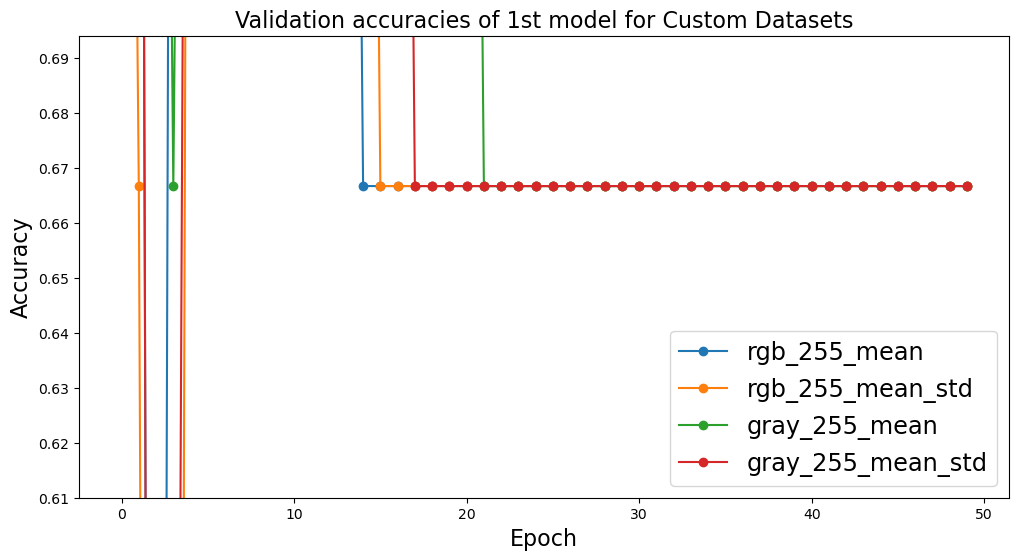

In [9]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all custom datasets for 1st model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.61, 0.694)


# Giving name to the plot
plt.title('Validation accuracies of 1st model for Custom Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('custom' + '/' + 'validation_model_1_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


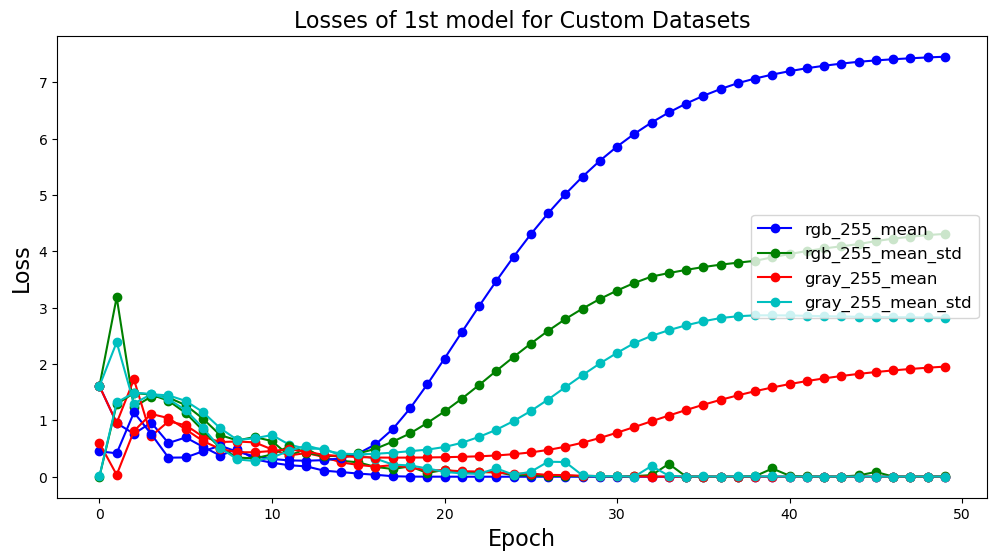

In [10]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all custom datasets for 1st model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='center right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 1st model for Custom Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('custom' + '/' + 'losses_model_1_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [11]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00076944975, 0.0007309773, 0.0006944284, 0.000659707, 0.00062672165, 0.00059538556, 0.0005656163, 0.00053733547, 0.0005104687, 0.00048494525, 0.00046069798, 0.00043766308, 0.00041577994, 0.00039499093, 0.0003752414, 0.00035647932, 0.00033865534, 0.0003217226, 0.00030563647, 0.00029035463, 0.0002758369, 0.00026204507, 0.00024894282, 0.00023649566, 0.00022467088, 0.00021343734, 0.00020276547, 0.0001926272, 0.00018299583, 0.00017384604, 0.00016515375, 0.00015689606, 0.00014905125, 0.00014159869, 0.00013451876, 0.00012779282, 0.00012140318, 0.000115333016, 0.00010956637, 0.00010408805, 9.888365e-05, 9.393947e-05, 8.9242494e-05, 8.478037e-05, 8.054135e-05, 7.651428e-05, 7.268857e-05, 6.905414e-05, 6.560143e-05, 6.2321364e-05]


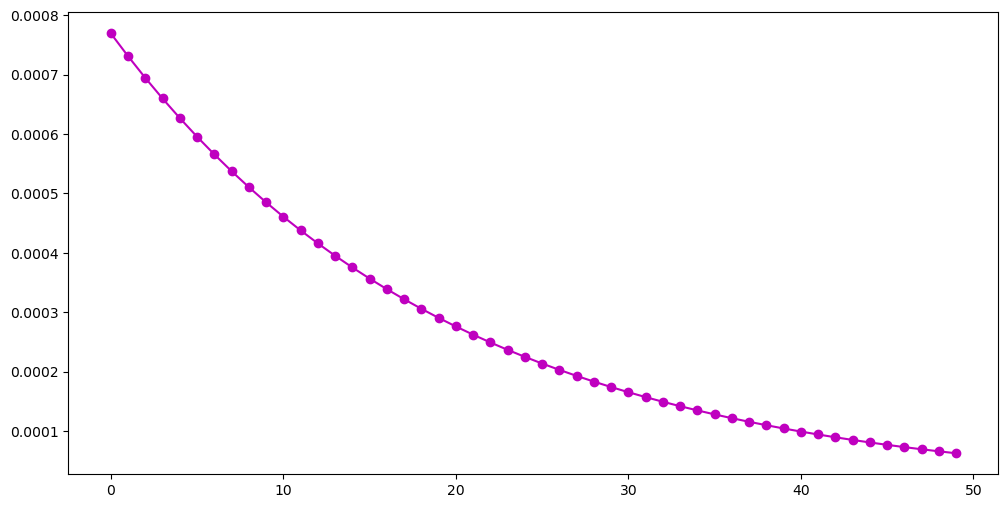

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### Custom dataset, 2nd model

## Step 1: Loading saved 2nd model

In [13]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for custom dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'custom' + '/' + 
                                'model_2_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'custom' + '/' + 
                                 'model_2_custom_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [14]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 64, 64, 3)

(None, 64, 64, 1)


### Custom dataset, 2nd model

## Step 2: Setting up learning rate & epochs

In [15]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### Custom dataset, 2nd model

## Step 3: Training

In [17]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 2nd model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 5)
    y_validation = to_categorical(y_validation, num_classes = 5)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'custom' + '/' + 'w_2' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'custom' + '/' + 'w_2' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])
    
    
    # Defining schedule to save intermediate weights
    class CustomCallback(Callback):
        # Constructor of the class
        def __init__(self):
            # Defining variable to be as a part of filename
            self.filename = 0
        
        # Function that is called at the end of every batch
        def on_train_batch_end(self, batch, logs=None):
            # Checking if it is every 10th batch
            if batch % 10 == 0:
                # Preparing filepath to save intermediate weights
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                intermediate_weights_filepath = 'custom' + '/' + \
                                                'intermediate' + '/' + \
                                                '{0:04d}'.format(self.filename) + \
                                                '_w_2' + \
                                                datasets[i][7:-5] + '.h5'
                
                # Getting weights only for the first convolutional layer
                weights_layer_0 = self.model.get_weights()[0]
                
                # Saving obtained weights into new HDF5 binary file
                # Initiating File object
                # Creating file with current name
                # Opening it in writing mode by 'w'
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                with h5py.File(intermediate_weights_filepath, 'w') as f:
                    # Calling method to create dataset of given shape and type
                    # Saving Numpy array with weights from the first layer
                    f.create_dataset('weights_layer_0', data=weights_layer_0, dtype='f')
                    
                # Increasing variable to be as a part of the next filename
                self.filename += 1
    
    
    # Check point
    print('Schedule to save intermediate weights is created:', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Checking if second RGB dataset is opened
        if i == 1:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights, CustomCallback()],
                                    verbose=1)
        
        # Checking if first RGB dataset is opened
        else:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights],
                                    verbose=1)

        
        # Adding results of 2nd model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 2nd model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()


Following dataset is successfully opened:         dataset_custom_rgb_255_mean.hdf5
Binary matrices are successfully created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save best weights is created:         dataset_custom_rgb_255_mean.hdf5
Schedule to save intermediate weights is created: dataset_custom_rgb_255_mean.hdf5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007694497527671316.
Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to custom\w_2_custom_rgb_255_mean.h5
1/1 [==============================] - 0s 410ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 12.6412 - val_accuracy: 0.3333

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007309772651287749.
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00002: val_accuracy did not improve from 0.33333
1/1 [=====


Epoch 00022: LearningRateScheduler reducing learning rate to 0.0002620450591493622.
Epoch 22/50
1/1 [==============================] - ETA: 0s - loss: 5.9605e-08 - accuracy: 1.0000
Epoch 00022: val_accuracy did not improve from 0.33333
1/1 [==============================] - 0s 44ms/step - loss: 5.9605e-08 - accuracy: 1.0000 - val_loss: 16.3752 - val_accuracy: 0.3333

Epoch 00023: LearningRateScheduler reducing learning rate to 0.00024894280619189405.
Epoch 23/50
1/1 [==============================] - ETA: 0s - loss: 8.3446e-08 - accuracy: 1.0000
Epoch 00023: val_accuracy did not improve from 0.33333
1/1 [==============================] - 0s 42ms/step - loss: 8.3446e-08 - accuracy: 1.0000 - val_loss: 16.4606 - val_accuracy: 0.3333

Epoch 00024: LearningRateScheduler reducing learning rate to 0.00023649566588229934.
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00024: val_accuracy did not improve from 0.33333
1/1 [================

1/1 [==============================] - ETA: 0s - loss: 1.3947e-06 - accuracy: 1.0000
Epoch 00044: val_accuracy did not improve from 0.33333
1/1 [==============================] - 0s 42ms/step - loss: 1.3947e-06 - accuracy: 1.0000 - val_loss: 16.8597 - val_accuracy: 0.3333

Epoch 00045: LearningRateScheduler reducing learning rate to 8.054134858296649e-05.
Epoch 45/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00045: val_accuracy did not improve from 0.33333
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 16.8613 - val_accuracy: 0.3333

Epoch 00046: LearningRateScheduler reducing learning rate to 7.651428115381816e-05.
Epoch 46/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00046: val_accuracy did not improve from 0.33333
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 16.8626 - val_accu


Epoch 00015: LearningRateScheduler reducing learning rate to 0.00037524139211116017.
Epoch 15/50
1/1 [==============================] - ETA: 0s - loss: 1.1921e-08 - accuracy: 1.0000
Epoch 00015: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 39ms/step - loss: 1.1921e-08 - accuracy: 1.0000 - val_loss: 17.9130 - val_accuracy: 0.3333

Epoch 00016: LearningRateScheduler reducing learning rate to 0.0003564793225056022.
Epoch 16/50
1/1 [==============================] - ETA: 0s - loss: 6.2124e-05 - accuracy: 1.0000
Epoch 00016: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 42ms/step - loss: 6.2124e-05 - accuracy: 1.0000 - val_loss: 27.1668 - val_accuracy: 0.3333

Epoch 00017: LearningRateScheduler reducing learning rate to 0.00033865535638032205.
Epoch 17/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00017: val_accuracy did not improve from 1.00000
1/1 [================

1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00037: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 47.4637 - val_accuracy: 0.3333

Epoch 00038: LearningRateScheduler reducing learning rate to 0.00011533301892006357.
Epoch 38/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00038: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 47.3681 - val_accuracy: 0.3333

Epoch 00039: LearningRateScheduler reducing learning rate to 0.00010956636797406039.
Epoch 39/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00039: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 47.2857 - val_ac


Epoch 00008: LearningRateScheduler reducing learning rate to 0.0005373354598274028.
Epoch 8/50
1/1 [==============================] - ETA: 0s - loss: 0.1787 - accuracy: 0.9000
Epoch 00008: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 43ms/step - loss: 0.1787 - accuracy: 0.9000 - val_loss: 3.5275 - val_accuracy: 0.6667

Epoch 00009: LearningRateScheduler reducing learning rate to 0.0005104686868360326.
Epoch 9/50
1/1 [==============================] - ETA: 0s - loss: 1.2817e-04 - accuracy: 1.0000
Epoch 00009: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 40ms/step - loss: 1.2817e-04 - accuracy: 1.0000 - val_loss: 4.1688 - val_accuracy: 0.6667

Epoch 00010: LearningRateScheduler reducing learning rate to 0.00048494525249423106.
Epoch 10/50
1/1 [==============================] - ETA: 0s - loss: 9.4215e-05 - accuracy: 1.0000
Epoch 00010: val_accuracy did not improve from 1.00000
1/1 [=============================

1/1 [==============================] - ETA: 0s - loss: 5.9605e-08 - accuracy: 1.0000
Epoch 00030: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 30ms/step - loss: 5.9605e-08 - accuracy: 1.0000 - val_loss: 8.8955 - val_accuracy: 0.3333

Epoch 00031: LearningRateScheduler reducing learning rate to 0.0001651537438501358.
Epoch 31/50
1/1 [==============================] - ETA: 0s - loss: 1.0729e-06 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 34ms/step - loss: 1.0729e-06 - accuracy: 1.0000 - val_loss: 8.9319 - val_accuracy: 0.3333

Epoch 00032: LearningRateScheduler reducing learning rate to 0.00015689605665762898.
Epoch 32/50
1/1 [==============================] - ETA: 0s - loss: 1.0764e-05 - accuracy: 1.0000
Epoch 00032: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 51ms/step - loss: 1.0764e-05 - accuracy: 1.0000 - val_loss: 8.9632 - val_accura

1/1 [==============================] - ETA: 0s - loss: 1.6344 - accuracy: 0.0000e+00
Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to custom\w_2_custom_gray_255_mean_std.h5
1/1 [==============================] - 1s 578ms/step - loss: 1.6344 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0007309772651287749.
Epoch 2/50
1/1 [==============================] - ETA: 0s - loss: 7.8371 - accuracy: 0.7000
Epoch 00002: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 49ms/step - loss: 7.8371 - accuracy: 0.7000 - val_loss: 0.1246 - val_accuracy: 1.0000

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000694428401872336.
Epoch 3/50
1/1 [==============================] - ETA: 0s - loss: 0.0667 - accuracy: 1.0000
Epoch 00003: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 43ms/step - loss: 0.0667 - accura


Epoch 00024: LearningRateScheduler reducing learning rate to 0.00023649566588229934.
Epoch 24/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00024: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.7693 - val_accuracy: 0.6667

Epoch 00025: LearningRateScheduler reducing learning rate to 0.00022467088258818434.
Epoch 25/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00025: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 10.0872 - val_accuracy: 0.6667

Epoch 00026: LearningRateScheduler reducing learning rate to 0.0002134373384587751.
Epoch 26/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00026: val_accuracy did not improve from 1.00000
1/1 [=================

1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00046: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 12.7535 - val_accuracy: 0.6667

Epoch 00047: LearningRateScheduler reducing learning rate to 7.268856709612724e-05.
Epoch 47/50
1/1 [==============================] - ETA: 0s - loss: 9.5367e-08 - accuracy: 1.0000
Epoch 00047: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 34ms/step - loss: 9.5367e-08 - accuracy: 1.0000 - val_loss: 12.7721 - val_accuracy: 0.6667

Epoch 00048: LearningRateScheduler reducing learning rate to 6.905413874132087e-05.
Epoch 48/50
1/1 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 00048: val_accuracy did not improve from 1.00000
1/1 [==============================] - 0s 42ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 12.7881 - val_accu

### Custom dataset, 2nd model

## Step 4: Showing and plotting results

In [18]:
# Resulted accuracies of all custom datasets for 2nd model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


T: 1.00000,  V: 0.33333,  D: custom_rgb_255_mean
T: 1.00000,  V: 1.00000,  D: custom_rgb_255_mean_std
T: 1.00000,  V: 1.00000,  D: custom_gray_255_mean
T: 1.00000,  V: 1.00000,  D: custom_gray_255_mean_std


In [19]:
# Showing other parameters that history holds
print(h[0].params)


{'verbose': 1, 'epochs': 50, 'steps': 1}


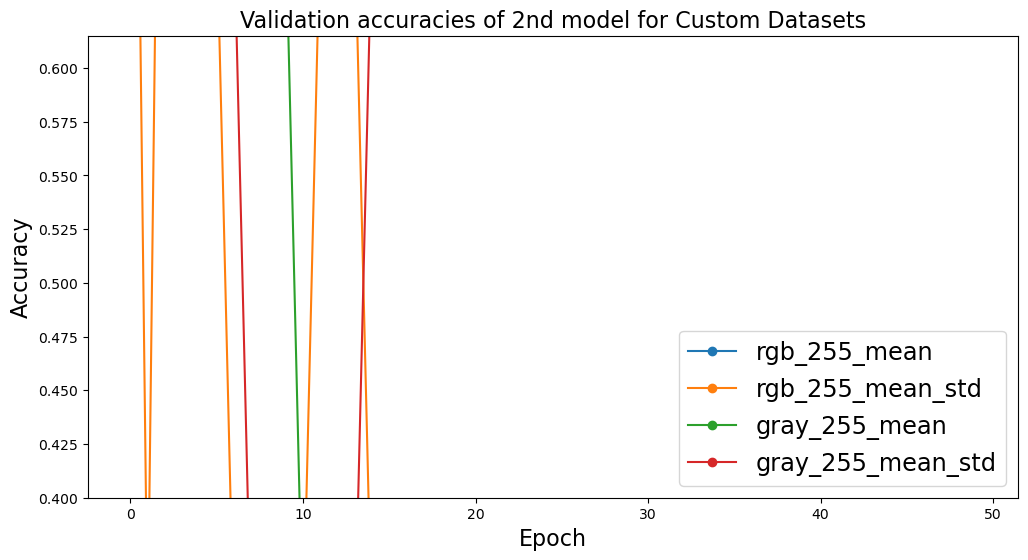

In [20]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all custom datasets for 2nd model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.4, 0.615)


# Giving name to the plot
plt.title('Validation accuracies of 2nd model for Custom Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('custom' + '/' + 'validation_model_2_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


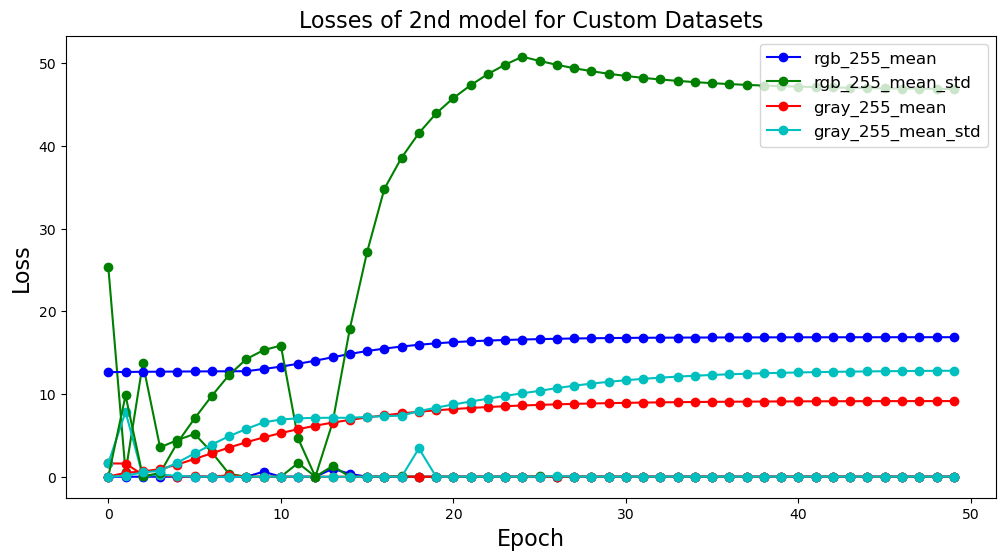

In [21]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all custom datasets for 2nd model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='upper right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 2nd model for Custom Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('custom' + '/' + 'losses_model_2_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [22]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


[0.00076944975, 0.0007309773, 0.0006944284, 0.000659707, 0.00062672165, 0.00059538556, 0.0005656163, 0.00053733547, 0.0005104687, 0.00048494525, 0.00046069798, 0.00043766308, 0.00041577994, 0.00039499093, 0.0003752414, 0.00035647932, 0.00033865534, 0.0003217226, 0.00030563647, 0.00029035463, 0.0002758369, 0.00026204507, 0.00024894282, 0.00023649566, 0.00022467088, 0.00021343734, 0.00020276547, 0.0001926272, 0.00018299583, 0.00017384604, 0.00016515375, 0.00015689606, 0.00014905125, 0.00014159869, 0.00013451876, 0.00012779282, 0.00012140318, 0.000115333016, 0.00010956637, 0.00010408805, 9.888365e-05, 9.393947e-05, 8.9242494e-05, 8.478037e-05, 8.054135e-05, 7.651428e-05, 7.268857e-05, 6.905414e-05, 6.560143e-05, 6.2321364e-05]


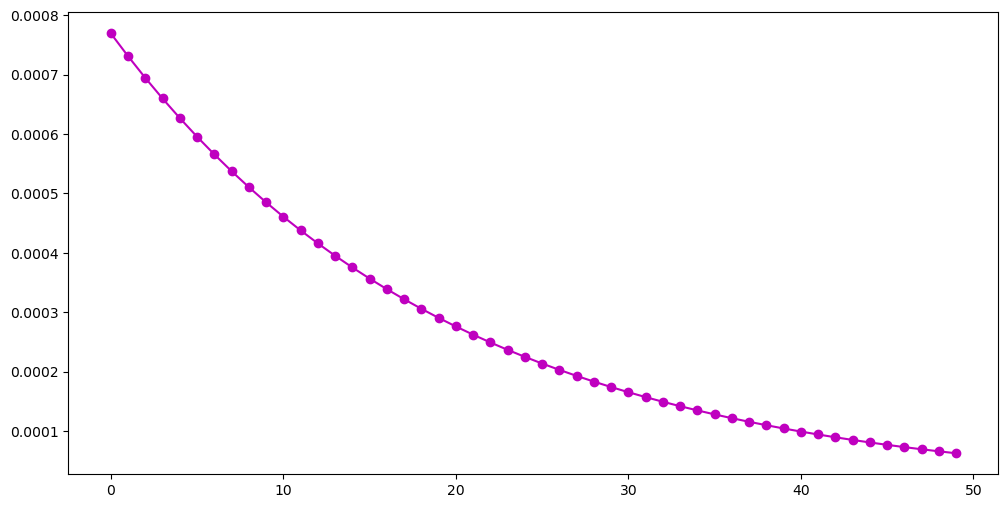

In [23]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### CIFAR-10 dataset, 1st model

## Step 1: Loading saved 1st model

In [24]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for CIFAR-10 dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'cifar10' + '/' + 
                                'model_1_cifar10_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'cifar10' + '/' + 
                                 'model_1_cifar10_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [25]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 32, 32, 3)

(None, 32, 32, 1)


### CIFAR-10 dataset, 1st model

## Step 2: Setting up learning rate & epochs

In [26]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### CIFAR-10 dataset, 1st model

## Step 3: Training

In [27]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_cifar10_rgb_255_mean.hdf5',
            'dataset_cifar10_rgb_255_mean_std.hdf5',
            'dataset_cifar10_gray_255_mean.hdf5',
            'dataset_cifar10_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 1st model with all CIFAR-10 datasets in a loop
for i in range(4):    
    # Opening saved CIFAR-10 dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 10)
    y_validation = to_categorical(y_validation, num_classes = 10)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'cifar10' + '/' + 'w_1' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'cifar10' + '/' + 'w_1' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Training RGB model with current dataset
        temp = model_rgb[i].fit(x_train, y_train,
                                batch_size=50,
                                epochs=epochs,
                                validation_data=(x_validation, y_validation),
                                callbacks=[learning_rate, best_weights],
                                verbose=1)

        
        # Adding results of 1st model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 1st model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()


Following dataset is successfully opened:         dataset_cifar10_rgb_255_mean.hdf5
Binary matrices are successfully created:         dataset_cifar10_rgb_255_mean.hdf5
Schedule to save best weights is created:         dataset_cifar10_rgb_255_mean.hdf5

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0007694497527671316.
Epoch 1/50
 49/850 [>.............................] - ETA: 10:08 - loss: 2.2230 - accuracy: 0.1624

KeyboardInterrupt: 

### CIFAR-10 dataset, 1st model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all CIFAR-10 datasets for 1st model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all CIFAR-10 datasets for 1st model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.71, 0.84)


# Giving name to the plot
plt.title('Validation accuracies of 1st model for CIFAR-10 Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('cifar10' + '/' + 'validation_model_1_cifar10_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all CIFAR-10 datasets for 1st model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='upper right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 1st model for CIFAR-10 Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('cifar10' + '/' + 'losses_model_1_cifar10_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### CIFAR-10 dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for CIFAR-10 dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'cifar10' + '/' + 
                                'model_2_cifar10_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'cifar10' + '/' + 
                                 'model_2_cifar10_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### CIFAR-10 dataset, 2nd model

## Step 2: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### CIFAR-10 dataset, 2nd model

## Step 3: Training

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_cifar10_rgb_255_mean.hdf5',
            'dataset_cifar10_rgb_255_mean_std.hdf5',
            'dataset_cifar10_gray_255_mean.hdf5',
            'dataset_cifar10_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 2nd model with all CIFAR-10 datasets in a loop
for i in range(4):
    # Opening saved CIFAR-10 dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 10)
    y_validation = to_categorical(y_validation, num_classes = 10)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])


    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'cifar10' + '/' + 'w_2' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'cifar10' + '/' + 'w_2' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])
    
    
    # Defining schedule to save intermediate weights
    class CustomCallback(Callback):
        # Constructor of the class
        def __init__(self):
            # Defining variable to be as a part of filename
            self.filename = 0
        
        # Function that is called at the end of every batch
        def on_train_batch_end(self, batch, logs=None):
            # Checking if it is every 100th batch
            if batch % 100 == 0:
                # Preparing filepath to save intermediate weights
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                intermediate_weights_filepath = 'cifar10' + '/' + \
                                                'intermediate' + '/' + \
                                                '{0:04d}'.format(self.filename) + \
                                                '_w_2' + \
                                                datasets[i][7:-5] + '.h5'
                
                # Getting weights only for the first convolutional layer
                weights_layer_0 = self.model.get_weights()[0]
                
                # Saving obtained weights into new HDF5 binary file
                # Initiating File object
                # Creating file with current name
                # Opening it in writing mode by 'w'
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                with h5py.File(intermediate_weights_filepath, 'w') as f:
                    # Calling method to create dataset of given shape and type
                    # Saving Numpy array with weights from the first layer
                    f.create_dataset('weights_layer_0', data=weights_layer_0, dtype='f')
                    
                # Increasing variable to be as a part of the next filename
                self.filename += 1
    
    
    # Check point
    print('Schedule to save intermediate weights is created:', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Checking if second RGB dataset is opened
        if i == 1:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights, CustomCallback()],
                                    verbose=1)
        
        # Checking if first RGB dataset is opened
        else:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights],
                                    verbose=1)

        
        # Adding results of 2nd model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 2nd model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()


### CIFAR-10 dataset, 2nd model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all CIFAR-10 datasets for 2nd model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all CIFAR-10 datasets for 2nd model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.5, 0.72)


# Giving name to the plot
plt.title('Validation accuracies of 2nd model for CIFAR-10 Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('cifar10' + '/' + 'validation_model_2_cifar10_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all CIFAR-10 datasets for 2nd model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='upper right',
           fontsize='medium')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 2nd model for CIFAR-10 Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('cifar10' + '/' + 'losses_model_2_cifar10_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### MNIST dataset, 1st model

## Step 1: Loading saved 1st model

In [ ]:
# Defining list to collect models in
model_gray = []


# Loading 1st model for MNIST dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'mnist' + '/' + 'model_1_mnist_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing model's input shape
print(model_gray[0].layers[0].input_shape)


### MNIST dataset, 1st model

## Step 2: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### MNIST dataset, 1st model

## Step 3: Training

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_mnist_gray_255_mean.hdf5',
            'dataset_mnist_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 1st model with all MNIST datasets in a loop
for i in range(2):    
    # Opening saved MNIST dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 10)
    y_validation = to_categorical(y_validation, num_classes = 10)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'mnist' + '/' + 'w_1' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'mnist' + '/' + 'w_1' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])

    
    # Training GRAY model with current dataset
    temp = model_gray[i].fit(x_train, y_train,
                             batch_size=50,
                             epochs=epochs,
                             validation_data=(x_validation, y_validation),
                             callbacks=[learning_rate, best_weights],
                             verbose=1)

    
    # Adding results of 1st model for current GRAY dataset in the list
    h.append(temp)
    
    
    # Check points
    print('1st model for GRAY is successfully trained on:   ', datasets[i])
    print('Trained weights for GRAY are saved successfully: ', 'w_1' + datasets[i][7:-5] + '.h5')
    print()


### MNIST dataset, 1st model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all MNIST datasets for 1st model
for i in range(2):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all MNIST datasets for 1st model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.989, 0.995)


# Giving name to the plot
plt.title('Validation accuracies of 1st model for MNIST Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('mnist' + '/' + 'validation_model_1_mnist_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all MNIST datasets for 1st model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')


# Showing legend
plt.legend(['gray_255_mean', 'gray_255_mean_std'],
           loc='upper right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 1st model for MNIST Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('mnist' + '/' + 'losses_model_1_mnist_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### MNIST dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Defining lists to collect models in
model_gray = []


# Loading 2nd model for MNIST dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'mnist' + '/' + 
                                 'model_2_mnist_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing model's input shape
print(model_gray[0].layers[0].input_shape)


### MNIST dataset, 2nd model

## Step 2: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### MNIST dataset, 2nd model

## Step 3: Training

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_mnist_gray_255_mean.hdf5',
            'dataset_mnist_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 2nd model with all MNIST datasets in a loop
for i in range(2):
    # Opening saved MNIST dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 10)
    y_validation = to_categorical(y_validation, num_classes = 10)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])


    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'mnist' + '/' + 'w_2' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'mnist' + '/' + 'w_2' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])
    
    
    # Defining schedule to save intermediate weights
    class CustomCallback(Callback):
        # Constructor of the class
        def __init__(self):
            # Defining variable to be as a part of filename
            self.filename = 0
        
        # Function that is called at the end of every batch
        def on_train_batch_end(self, batch, logs=None):
            # Checking if it is every 100th batch
            if batch % 100 == 0:
                # Preparing filepath to save intermediate weights
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                intermediate_weights_filepath = 'mnist' + '/' + \
                                                'intermediate' + '/' + \
                                                '{0:04d}'.format(self.filename) + \
                                                '_w_2' + \
                                                datasets[i][7:-5] + '.h5'
                
                # Getting weights only for the first convolutional layer
                weights_layer_0 = self.model.get_weights()[0]
                
                # Saving obtained weights into new HDF5 binary file
                # Initiating File object
                # Creating file with current name
                # Opening it in writing mode by 'w'
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                with h5py.File(intermediate_weights_filepath, 'w') as f:
                    # Calling method to create dataset of given shape and type
                    # Saving Numpy array with weights from the first layer
                    f.create_dataset('weights_layer_0', data=weights_layer_0, dtype='f')
                    
                # Increasing variable to be as a part of the next filename
                self.filename += 1
    
    
    # Check point
    print('Schedule to save intermediate weights is created:', datasets[i])

    
    # Checking if second GRAY dataset is opened
    if i == 1:
        # Training GRAY model with current dataset
        temp = model_gray[i].fit(x_train, y_train,
                                 batch_size=50,
                                 epochs=epochs,
                                 validation_data=(x_validation, y_validation),
                                 callbacks=[learning_rate, best_weights, CustomCallback()],
                                 verbose=1)
        
    # Checking if first GRAY dataset is opened
    else:
        # Training GRAY model with current dataset
        temp = model_gray[i].fit(x_train, y_train,
                                 batch_size=50,
                                 epochs=epochs,
                                 validation_data=(x_validation, y_validation),
                                 callbacks=[learning_rate, best_weights],
                                 verbose=1)

        
    # Adding results of 2nd model for current GRAY dataset in the list
    h.append(temp)
    
    
    # Check points
    print('2nd model for GRAY is successfully trained on:   ', datasets[i])
    print('Trained weights for GRAY are saved successfully: ', 'w_2' + datasets[i][7:-5] + '.h5')
    print()


### MNIST dataset, 2nd model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all MNIST datasets for 2nd model
for i in range(2):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all MNIST datasets for 2nd model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.985, 0.993)


# Giving name to the plot
plt.title('Validation accuracies of 2nd model for MNIST Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('mnist' + '/' + 'validation_model_2_mnist_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all MNIST datasets for 2nd model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')


# Showing legend
plt.legend(['gray_255_mean', 'gray_255_mean_std'],
           loc='center right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 2nd model for MNIST Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('mnist' + '/' + 'losses_model_2_mnist_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### Traffic Signs dataset, 1st model

## Step 1: Loading saved 1st model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for Traffic Signs dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'ts' + '/' + 
                                'model_1_ts_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'ts' + '/' + 
                                 'model_1_ts_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### Traffic Signs dataset, 1st model

## Step 2: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### Traffic Signs dataset, 1st model

## Step 3: Training

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_ts_rgb_255_mean.hdf5',
            'dataset_ts_rgb_255_mean_std.hdf5',
            'dataset_ts_gray_255_mean.hdf5',
            'dataset_ts_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 1st model with all Traffic Signs datasets in a loop
for i in range(4):
    # Opening saved Traffic Signs dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 43)
    y_validation = to_categorical(y_validation, num_classes = 43)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])
 

    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'ts' + '/' + 'w_1' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'ts' + '/' + 'w_1' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Training RGB model with current dataset
        temp = model_rgb[i].fit(x_train, y_train,
                                batch_size=50,
                                epochs=epochs,
                                validation_data=(x_validation, y_validation),
                                callbacks=[learning_rate, best_weights],
                                verbose=1)

        
        # Adding results of 1st model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 1st model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('1st model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_1' + datasets[i][7:-5] + '.h5')
        print()


### Traffic Signs dataset, 1st model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all Traffic Signs datasets for 1st model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all Traffic Signs datasets for 1st model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.97, 0.9992)


# Giving name to the plot
plt.title('Validation accuracies of 1st model for Traffic Signs Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('ts' + '/' + 'validation_model_1_ts_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all Traffic Signs datasets for 1st model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='center right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 1st model for Traffic Signs Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('ts' + '/' + 'losses_model_1_ts_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### Traffic Signs dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for Traffic Signs dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'ts' + '/' + 
                                'model_2_ts_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'ts' + '/' + 
                                 'model_2_ts_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### Traffic Signs dataset, 2nd model

## Step 2: Setting up learning rate & epochs

In [ ]:
# Defining number of epochs
epochs = 50


# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** (x + epochs), verbose=1)


# Check point
print('Number of epochs and schedule for learning rate are set successfully')


### Traffic Signs dataset, 2nd model

## Step 3: Training

In [ ]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Preparing list with datasets' names
datasets = ['dataset_ts_rgb_255_mean.hdf5',
            'dataset_ts_rgb_255_mean_std.hdf5',
            'dataset_ts_gray_255_mean.hdf5',
            'dataset_ts_gray_255_mean_std.hdf5']


# Defining list to collect results in
h = []


# Training 2nd model with all Traffic Signs datasets in a loop
for i in range(4):
    # Opening saved Traffic Signs dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for training by appropriate keys
        # Saving them into new variables
        x_train = f['x_train']  # HDF5 dataset
        y_train = f['y_train']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_train = np.array(x_train)  # Numpy arrays
        y_train = np.array(y_train)  # Numpy arrays

        # Extracting saved arrays for validation by appropriate keys
        # Saving them into new variables
        x_validation = f['x_validation']  # HDF5 dataset
        y_validation = f['y_validation']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_validation = np.array(x_validation)  # Numpy arrays
        y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Check point
    print('Following dataset is successfully opened:        ', datasets[i])
    
    
    # Preparing classes to be passed into the model
    # Transforming them from vectors to binary matrices
    # It is needed to set relationship between classes to be understood by the algorithm
    # Such format is commonly used in training and predicting
    y_train = to_categorical(y_train, num_classes = 43)
    y_validation = to_categorical(y_validation, num_classes = 43)
    
    
    # Check point
    print('Binary matrices are successfully created:        ', datasets[i])


    # Preparing filepath to save best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    best_weights_filepath = 'ts' + '/' + 'w_2' + datasets[i][7:-5] + '.h5'
    
    # Formatting options to save all weights for every epoch
    # 'ts' + '/' + 'w_2' + datasets[i][7:-5] + '_{epoch:02d}_{val_accuracy:.4f}' + '.h5'
    
    # Defining schedule to save best weights
    best_weights = ModelCheckpoint(filepath=best_weights_filepath,
                                   save_weights_only=True,                                   
                                   monitor='val_accuracy',
                                   mode='max',
                                   save_best_only=True,
                                   period=1,
                                   verbose=1)
    
    
    # Check point
    print('Schedule to save best weights is created:        ', datasets[i])
    
    
    # Defining schedule to save intermediate weights
    class CustomCallback(Callback):
        # Constructor of the class
        def __init__(self):
            # Defining variable to be as a part of filename
            self.filename = 0
        
        # Function that is called at the end of every batch
        def on_train_batch_end(self, batch, logs=None):
            # Checking if it is every 100th batch
            if batch % 100 == 0:
                # Preparing filepath to save intermediate weights
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                intermediate_weights_filepath = 'ts' + '/' + \
                                                'intermediate' + '/' + \
                                                '{0:04d}'.format(self.filename) + \
                                                '_w_2' + \
                                                datasets[i][7:-5] + '.h5'
                
                # Getting weights only for the first convolutional layer
                weights_layer_0 = self.model.get_weights()[0]
                
                # Saving obtained weights into new HDF5 binary file
                # Initiating File object
                # Creating file with current name
                # Opening it in writing mode by 'w'
                # (!) On Windows, it might need to change
                # this: + '/' +
                # to this: + '\' +
                # or to this: + '\\' +
                with h5py.File(intermediate_weights_filepath, 'w') as f:
                    # Calling method to create dataset of given shape and type
                    # Saving Numpy array with weights from the first layer
                    f.create_dataset('weights_layer_0', data=weights_layer_0, dtype='f')
                    
                # Increasing variable to be as a part of the next filename
                self.filename += 1
    
    
    # Check point
    print('Schedule to save intermediate weights is created:', datasets[i])

    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Checking if second RGB dataset is opened
        if i == 1:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights, CustomCallback()],
                                    verbose=1)
        
        # Checking if first RGB dataset is opened
        else:
            # Training RGB model with current dataset
            temp = model_rgb[i].fit(x_train, y_train,
                                    batch_size=50,
                                    epochs=epochs,
                                    validation_data=(x_validation, y_validation),
                                    callbacks=[learning_rate, best_weights],
                                    verbose=1)

        
        # Adding results of 2nd model for current RGB dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for RGB is successfully trained on:    ', datasets[i])
        print('Trained weights for RGB are saved successfully:  ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Training GRAY model with current dataset
        temp = model_gray[i-2].fit(x_train, y_train,
                                   batch_size=50,
                                   epochs=epochs,
                                   validation_data=(x_validation, y_validation),
                                   callbacks=[learning_rate, best_weights],
                                   verbose=1)

        
        # Adding results of 2nd model for current GRAY dataset in the list
        h.append(temp)
        
        
        # Check points
        print('2nd model for GRAY is successfully trained on:   ', datasets[i])
        print('Trained weights for GRAY are saved successfully: ', 'w_2' + datasets[i][7:-5] + '.h5')
        print()


### Traffic Signs dataset, 2nd model

## Step 4: Showing and plotting results

In [ ]:
# Resulted accuracies of all Traffic Signs datasets for 2nd model
for i in range(4):
    print('T: {0:.5f},  V: {1:.5f},  D: {2}'.format(max(h[i].history['accuracy']),
                                                    max(h[i].history['val_accuracy']),
                                                    datasets[i][8:-5]))


In [ ]:
# Showing other parameters that history holds
print(h[0].params)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies of all Traffic Signs datasets for 2nd model
plt.plot(h[0].history['val_accuracy'], '-o')
plt.plot(h[1].history['val_accuracy'], '-o')
plt.plot(h[2].history['val_accuracy'], '-o')
plt.plot(h[3].history['val_accuracy'], '-o')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='lower right',
           fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Setting limit along Y axis
plt.ylim(0.88, 0.994)


# Giving name to the plot
plt.title('Validation accuracies of 2nd model for Traffic Signs Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('ts' + '/' + 'validation_model_2_ts_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting training and validation losses of all Traffic Signs datasets for 2nd model
plt.plot(h[0].history['loss'], '-ob')
plt.plot(h[1].history['loss'], '-og')
plt.plot(h[2].history['loss'], '-or')
plt.plot(h[3].history['loss'], '-oc')

plt.plot(h[0].history['val_loss'], '-ob')
plt.plot(h[1].history['val_loss'], '-og')
plt.plot(h[2].history['val_loss'], '-or')
plt.plot(h[3].history['val_loss'], '-oc')


# Showing legend
plt.legend(['rgb_255_mean', 'rgb_255_mean_std',
            'gray_255_mean', 'gray_255_mean_std'],
           loc='center right',
           fontsize='large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)


# Giving name to the plot
plt.title('Losses of 2nd model for Traffic Signs Datasets', fontsize=16)


# Saving plot
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
plt.savefig('ts' + '/' + 'losses_model_2_ts_dataset.png', dpi=500)


# Showing the plot
plt.show()


In [ ]:
# Showing list of scheduled learning rate for every epoch
print(h[0].history['lr'])


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h[0].history['lr'], '-mo')


# Showing the plot
plt.show()


### Some comments

To get more details for usage of 'ModelCheckpoint' class:  
**print(help(ModelCheckpoint))**  
  
More details and examples are here:  
 - https://keras.io/api/callbacks/  
 - https://keras.io/api/callbacks/model_checkpoint/  
 - https://keras.io/guides/writing_your_own_callbacks/


In [ ]:
print(help(ModelCheckpoint))